In [2]:
import pandas as pd
df = pd.read_parquet('sources/metadata.parquet', engine='pyarrow')
df_large = pd.read_parquet('sources/metadata-large.parquet', engine='pyarrow')

exact_matches = pd.read_parquet('results/artists_exact_match_large.parquet', engine='pyarrow')
assert "artists" in exact_matches.columns, f'artists is not in {exact_matches.columns}'
assert "num_artists" in exact_matches.columns, f'num_artists is not in {exact_matches.columns}'


# read excel_artist_names
import my_utils

excel_artist_names = my_utils.read_lines_as_list("sources/excel_artists_copy_paste_name.txt")
hundred_artist_names = excel_artist_names[0:100]
ten_artist_names = excel_artist_names[0:10]


artist_mentions = pd.read_parquet('results/artist_mentions.parquet', engine='pyarrow')

In [ ]:
df.shape

In [ ]:
len(df["prompt"].unique())

# Artist Mentions

In [ ]:

search_padding = 10

# we could try to check if some of the artists are more refered to by their last name
print(f'{artist_mentions.loc[ artist_mentions["mentions"] == 0 ].shape[0]} artists were not mentioned')
print("artists with no exact match:")
for artist_row in artist_mentions.loc[ artist_mentions["mentions"] == 0 ].iterrows():
    
    name = artist_row[1]['artist']
    lastname = name.split(" ")[-1]
    print(f'{name} --> lastname: {lastname}\nchecking for lastname matches')
    lastname_matches = my_utils.exact_match_dataframe(exact_matches, lastname)
    if lastname_matches.shape[0] > 0:
        #print(lastname_matches["prompt"].head())
        for index, row in lastname_matches.iterrows():
            startindex = row['prompt'].index(lastname) -search_padding if row['prompt'].index(lastname) - search_padding > 0 else 0
            end = row['prompt'].index(lastname) + len(lastname) + search_padding if row['prompt'].index(lastname) + len(lastname) + search_padding < len(row["prompt"]) else len(row["prompt"])
            print(row['prompt'][startindex:end])



            
            

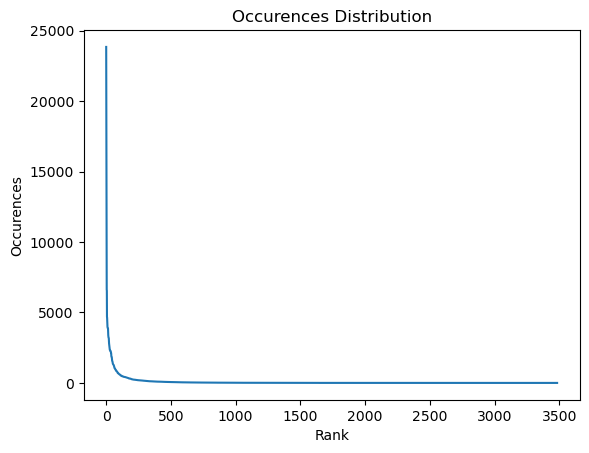

In [8]:

import matplotlib.pyplot as plt

occs = pd.read_parquet('results/artist_mentions.parquet', engine='pyarrow')


x_data = range(occs.shape[0])
y_data = [x[1]["mentions"] for artist_row in artist_mentions.loc[ artist_mentions["mentions"] == 0 ].iterrows():]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_data, y_data)
ax.set_xlabel('Rank')
ax.set_ylabel('Occurences')
ax.set_title('Artist Mentions Distribution')

plt.show()


In [ ]:
import my_utils


pd.options.display.max_colwidth = 1000

name = "greg rutkowski"
exact_matches = my_utils.exact_match_dataframe(df, name)

print(f'{name} exact match found {exact_matches.shape[0]} times')
print(f'some prompts:')
print(exact_matches.head(10)["prompt"])

## Top Artist exact matching

[(23846, 'Greg Rutkowski'), (18782, 'Artgerm'), (13473, 'WLOP'), (12332, 'Alphonse Mucha'), (6632, 'Makoto Shinkai'), (6535, 'James Jean'), (4688, 'Karol Bak'), (4632, 'Marc Simonetti'), (4382, 'Ruan Jia'), (4049, 'Charlie Bowater'), (3966, 'Tom Bagshaw'), (3907, 'Ayami Kojima'), (3896, 'Mark Brooks'), (3866, 'Ilya Kuvshinov'), (3864, 'Trending on artstation'), (3515, 'Edward Hopper'), (3374, 'Greg Hildebrandt'), (3284, 'Peter Mohrbacher'), (3217, 'Ross Tran'), (3200, 'Tooth Wu'), (3186, 'Craig Mullins'), (2893, 'Wayne Barlowe'), (2812, 'Moebius'), (2732, 'Krenz Cushart'), (2685, 'Jean Delville'), (2624, 'Yoshitaka Amano'), (2433, 'Sakimichan'), (2365, 'Michael Whelan'), (2336, 'Caravaggio'), (2328, 'Mandy Jurgens')]


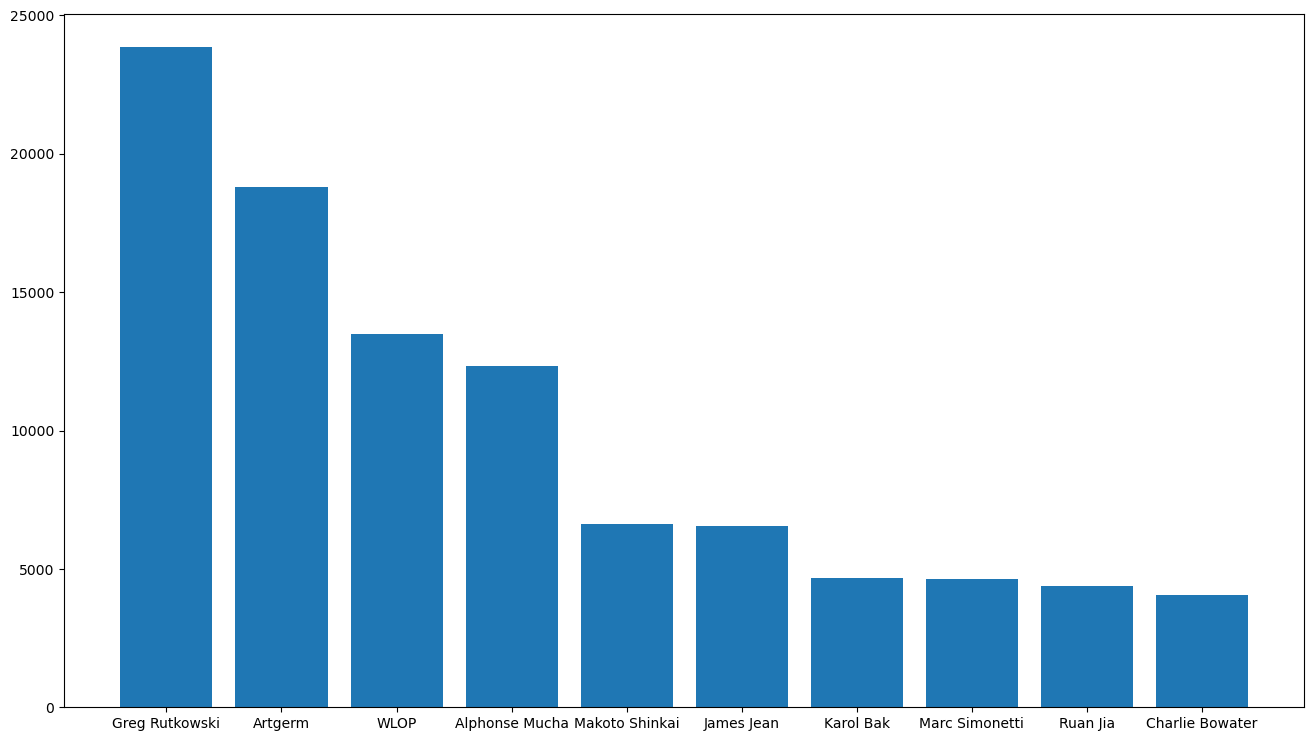

In [5]:
import matplotlib.pyplot as plt

top = 10


exact_matches.sort_values("mentions", axis=0, ascending=False, inplace=True)

print(f'top {top} artists')
print(artist_occ_list.head(top))

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1) # fig.add_axes([0,0,1,1])
names = [x for x in artist_occ_list["artist"].loc[0:top]]
values = [x for x in artist_occ_list["mentions"].loc[0:top]]
ax.bar(names,values)
ax.set_title(f'Top {top} mentioned artists')
plt.show()

1005846 prompts had 0 painters found
350568 prompts had 1 painters found
174596 prompts had 2 painters found
135420 prompts had 3 painters found
69878 prompts had 4 painters found
38795 prompts had 5 painters found
22386 prompts had 6 painters found
9028 prompts had 7 painters found
5688 prompts had 8 painters found
3892 prompts had 9 painters found
1849 prompts had 10 painters found
811 prompts had 11 painters found
337 prompts had 12 painters found
365 prompts had 13 painters found
136 prompts had 14 painters found
33 prompts had 15 painters found
30 prompts had 16 painters found
33 prompts had 17 painters found
22 prompts had 18 painters found
10 prompts had 19 painters found
60 prompts had 20 painters found
6 prompts had 21 painters found
1 prompts had 22 painters found
1 prompts had 23 painters found
2 prompts had 24 painters found
2 prompts had 25 painters found
3 prompts had 30 painters found
7 prompts had 34 painters found
1 prompts had 41 painters found
1 prompts had 62 painte

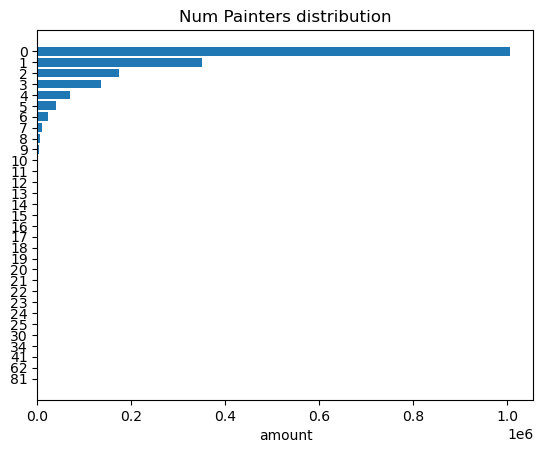

1005846 prompts had zero painters found
350568 prompts had one painter found
463394 prompts had two or more painters found


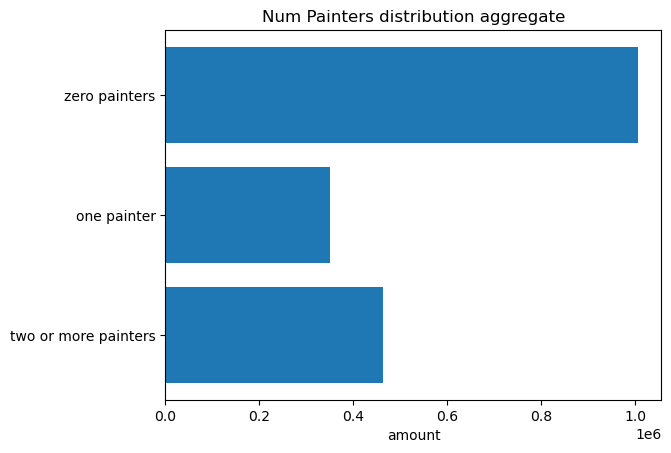

In [21]:
prompt_artists_large = pd.read_parquet("results/artists_exact_match_large.parquet", engine='pyarrow')

import matplotlib.pyplot as plt

mean_num_artists = prompt_artists_large["num_artists"].mean(axis=0)
print(f'on average {mean_num_artists} are mentioned per prompt')
  
# labels
labels  = prompt_artists_large["num_artists"].unique()
labels.sort()
  
# values
values = [prompt_artists_large[prompt_artists_large["num_artists"]==x].shape[0] for x in labels]
  
for l, v in zip(labels, values):
    print(f'{v} prompts had {l} artists found')
    
    

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = range(len(labels))

ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('amount')
ax.set_title('Num artists distribution')

plt.show()

aggregate_labels = ["zero artists", "one painter", "two or more artists"]
aggregate_values = [prompt_artists_large[prompt_artists_large["num_artists"]==0].shape[0], prompt_artists_large[prompt_artists_large["num_artists"]==1].shape[0], prompt_artists_large[prompt_artists_large["num_artists"]>=2].shape[0]]

for l, v in zip(aggregate_labels, aggregate_values):
    print(f'{v} prompts had {l} found')

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = range(len(aggregate_labels))

ax.barh(y_pos, aggregate_values, align='center')
ax.set_yticks(y_pos, labels=aggregate_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('amount')
ax.set_title('Num artists distribution aggregate')

plt.show()



# Co-occurrences

## For prompts with 2 or more mentioned painters

In [5]:
painter_names = hundred_artist_names
painter_names = [x.lower() for x in painter_names]

cols = ["prompt", "image_name"]

occurences =  pd.DataFrame(columns=cols)
for name in painter_names:
    # create new column for each painter with default value 0
    occurences[painter_names] = 0

print(occurences)

n = 10000
cp = df.head(n)[cols].copy()
assert cp.shape[0] == n




print(f'shape before num_artists cut {cp.shape}')
cp = cp[cp["num_artists"]>0]

print(("extracting finished"))
print(cp.head())

for _, entry in cp.iterrows():
    #print(entry)
    new_row = dict()
    new_row['image_name'] = entry['image_name']
    new_row['prompt'] = entry['prompt']
    for name in painter_names:
        new_row[name] = 0
    
    # set to one for each painter that really occured
    for name in entry['artists']:
        new_row[name] = 1
    
    new_row = pd.Series(new_row)
    #print(new_row)
    
    occurences = pd.concat([occurences, new_row.to_frame().T], ignore_index=True)

# assert occurences.shape == (n, 2 + len(painter_names)), f'shape is {occurences.shape}'


print(occurences.head())    

print("head:")
print(occurences[painter_names].head())

print("covariance:")
# https://www.w3resource.com/pandas/dataframe/dataframe-cov.php
print(occurences[painter_names].cov())

print("finished")

/tmp/ipykernel_488384/1572280005.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occurences[painter_names] = 0


Empty DataFrame
Columns: [prompt, image_name, alvar aalto, slim aarons, edwin austin abbey, gertrude abercrombie, marina abramović, tomma abts, vito acconci, andreas achenbach, norman ackroyd, ansel adams, arthur adams, neal adams, josh adamski, charles addams, etel adnan, mattias adolfsson, alena aenami, pieter aertsen, hilma af klint, affandi, leonid afremov, yaacov agam, eileen agar, jacques-laurent agasse, craigie aitchison, doug aitken, ivan aivazovsky, david aja, sherry akrami, rashad alakbarov, anni albers, josef albers, alessio albi, ivan albright, rafael albuquerque, miles aldridge, alex alemany, john white alexander, helen allingham, alessandro allori, mike allred, nick alm, lawrence alma-tadema, lilia alvarado, emil alzamora, yoshitaka amano, ghada amer, cuno amiet, rick amor, fernando amorsolo, jay anacleto, el anatsui, anna ancher, michael ancher, hans christian andersen, sarah andersen, richard anderson, sophie anderson, wes anderson, tadao ando, alex andreev, esao andrew

/tmp/ipykernel_488384/1572280005.py:55: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(occurences[painter_names].cov())


## TODO Co-occurrence Network

https://www.kaggle.com/code/itoeiji/simple-co-occurrence-network